# Investigating Fandango Movie Ratings

Fandango is an online rating aggregator, such as IMDB. A journalst called # found during an investigation that Fandango level up they movie ratings making their movie ratings higher than the actual.

This may immplied that Fandango maniulated the ratings om purpose, the official andswer of Fandango was that this problema was made becuae a bug, so in this project a more recent DataSet from Fandango will be analyzed in order to find if these problems dissapeared.

El objetivo de este proyecto es determinar si el sistema de calificacion de fandango ha cambiado despues de el analisis de este wey, para eso voy a comparar los analisis que se hacian antes del analisis de este wey, y el analisis que se esta haciendo ahora, ;a poblacion de interes son todas las peliculas que tienen alguna calificacion.

La poblacion esta puesta, y necesito dos muestras, una muestra de lka poblacion antes del analisis, y una mustesra de la poblacion despues del analisis, estas dos muestras seran cargadas a continuacion.

La mejor maner de saber si ha habido cambios en las calificaciones de Fandango es comparar informacion anterior y despues del analisis del periodista, entonces necesitamos dos Datasets, afortunadamente elperiodista subio el DataSet con el que trabajo, lo pueden encontrar [aqui](https://github.com/fivethirtyeight/data/tree/master/fandango), Y el Dataset de ccalificaciones de peliculas tiempo despues despues de la publicacion de su analisis la encuentras
[aqui](https://github.com/mircealex/Movie_ratings_2016_17).

In [1]:
import pandas as pd

In [2]:
fandango=pd.read_csv('fandango_score_comparison.csv')
movie=pd.read_csv('movie_ratings_16_17.csv')

In [3]:
fandango.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [4]:
movie.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


Viendo ambos DataSets, hay columnas que no necesitamos, aislemoslas de las que necesitamos.

Leyendo la documentacion para el DataSet para saber de que se trata cada columna, aislaremos las siguientes columnas:

- 'FILM'
- 'Fandango_Stars', 
- 'Fandango_Ratingvalue', 
- 'Fandango_votes', 
- 'Fandango_Difference'

Y Para el segundo DataSet aislaremos las siguientes columnas:

- movie
- year
- fandango

In [5]:
Fandango=fandango[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
After=movie[['movie', 'year', 'fandango']]

In [6]:
After.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


Ya que agarramos las columnas que tinen informacion pertienente para el analisis, es momento de asegurarme que las muestras son representativas de la poblacion, si no, voy a obtener conclcuiones que son fuera de la realidad.

Para la muestra antes del analisis:
- Los datos que fueron obtenidos tenian que tener una calificacion de Roten Tomatoes.
- Los datos tienen que tener al menos 30 calificaciones de usuarios.

Para la muestra despues:
- Los datos tenien que tner una cantidad significativa de calificaciones.
- Hayan sido estrenadas entre 2016 y 2017

Teniendo esto en cuento, las peliculas no tuvieron las mismas oportunidades de ser selccionadas, incluso ni si quieran tuvieron oportunidad. Tambien, al ser escogidas por tiempo, se genera una tendencia en las peliculas, por lo que si representatividad se puede dudar.

Ya que las muestras con las que ando trabajando no son representativas, un analisis solo llevareia a conclusiones incorrectas.

El muestreo de los autores de estas muestras en realidad no estan mal, pues fueron orientados a responder sus propias preguntas de investigacion, este tipo de muestreo se le llama muestreo con proposito, sin embargo para el proposito de este proyecto, no nos sirve. Asi que existen dos cosas:

-Cambiar complemtamente de DataSets y encontrar nuevas, quesuponfira mucho tiempo de investigacion.
- Cambiar el objetivo de este proyecto.

## Changing the goal of the project.


El cambio de objetivo, para trabajar con la informacion que tengo, sera encontrar las diferencias entre las calificaicones de las peliculas populares del 2015 y las peliculas populares del 2016.

Antes de continuar tengo que definir con precision ue son peliculas populares para asi poder comparar manzanas con manzanas. 

Se utilizara el mismo principio que uso Hickey, en donde se considerara a una pelicula popular si esta tiene 30 o mas calificaciones de fans.

Pero entonces ahora tengo que checar si mis muestras son representativas a este nuevo objetivo, es decir, tengo que ver si la mayoria de las peliculas en mi muestra tienen 30 calificaciones o mas.

### Checando si hay peliculas populares en los datasets.

In [7]:
Fandango.head()
# Separar la fecha del nombre de la pelicula
fecha=Fandango['FILM'].str.split('(')
Movie=[]
Date=[]
for each in fecha:
    Movie.append(each[0])
    Date.append(each[1])

Movie=pd.Series(Movie)
Date=pd.Series(Date)

Fandango['Movie']=Movie
Fandango['Date']=Date

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [8]:
Fandango['Date']=Fandango['Date'].str.replace(')','')
fandango=Fandango[['Movie','Date','Fandango_Stars','Fandango_votes','Fandango_Difference']]
Fandango.head()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Movie,Date
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,Avengers: Age of Ultron,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,Cinderella,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,Ant-Man,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,Do You Believe?,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,Hot Tub Time Machine 2,2015


In [9]:
print((fandango['Fandango_votes']<30).sum())

0


Para este dataset podemos estar tranqulos, no hay ningun data point que tenga menos de 30.

Veamos ahora el siguiente DataSet.

In [10]:
After.head()
sample=After.sample(10,random_state=1)
sample

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Para este Dataset no hay ninguna columna que me indica la cantidad de votos que tiene cada pelicula, por lo que no tengo manera de saber si son peliculas con mayors de 30 votos.

Asi que tomaremos una muestra de 10peliculas y veremos manualmente cuantos votos tienen en la pagina de Roting Tomatos. El resultado de la busqueda manual es el siquiente:

![](Captura.PNG)

Ahora exploremos las fechas en las que salieron cada peloicula y ver si estan dento de los anos que estamos interesados, que son `2015` y `2016`, si n o pertenecen a estos anos entonces hay que quitarlos del dataset.

In [11]:
fandango['Date'].value_counts()

2015    129
2014     17
Name: Date, dtype: int64

Tenemos 17 peliculas del ano 2014 para el dataset `Anterior`

In [12]:
After['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

Tenemos 23 peliculas del ano 2017 para el datset `Despues`

Pasemos a remover estas fechas de nuestro DaatSet

In [13]:
fandango=fandango[fandango['Date']=='2015']
After=After[After['year']==2016]

In [14]:
print(fandango['Date'].unique(),After['year'].unique())

['2015'] [2016]


In [15]:
fandango['Date'].value_counts()

2015    129
Name: Date, dtype: int64

## Analysis

Recordemos que nuestro objetivo es saber si hay una diferencia entre las calificaciones de las peliculas en Fandango del 2015 y el 2016.

Empecemos con algo simple y veamos la dsistribucion de las calificaciones para ambas muestras.


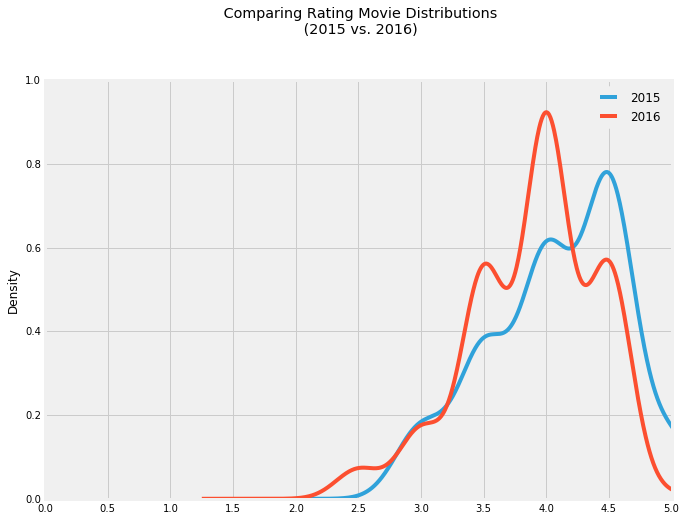

In [16]:
import matplotlib.pyplot as plt
from numpy import arange
plt.style.use('fivethirtyeight')
%matplotlib inline

fandango['Fandango_Stars'].plot.kde(label='2015',legend=True,figsize=(10,7.5))
After['fandango'].plot.kde(label='2016',legend=True)
plt.title(' Comparing Rating Movie Distributions\n (2015 vs. 2016)',y=1.1)
# plt.xlabel('Stars')

plt.xlim(0,5)
plt.xticks(arange(0,5.1,.5))
plt.legend()
plt.show()

Ambas distribuciones estan `skewed` por la izquierda. Lo que idica que las estrellas dadas por lo usuarios a las peliculas son altas y muy altas.

Hay una diferencia en las estrellas que se dieron entre el 2015 y 2016, claramente se califica un poco mas bajo a las peliculas en el ano 2016, lo que indica que si hubo un cambio entre el rating de las peliculas en Fandango en 2016 con respeto al 2015.

## Relative Frequencies

In [17]:
fandango['Fandango_Stars'].value_counts(normalize=True).sort_index()*100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [18]:
fandango['Fandango_Stars'].value_counts(normalize=True).sort_index()*100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [19]:
After['fandango'].value_counts(normalize=True).sort_index()*100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

Despues de hacer las tablas de frecuencia relativa para ambas distribuciones, esta claro que existe una diferencia entre ellas, pero es algo dificil de ver a quien le corresponde cada diferencia, no es tan claro como cuando graficamos la grafica de kernel, asi que usaremos unas estaditicas de resumen para tener una mejor imagen de a quien le correspende dicha direccion en la diferencia.

In [37]:
media_2015=fandango['Fandango_Stars'].mean()
media_2016=After['fandango'].mean()

mediana_2015=fandango['Fandango_Stars'].median()
mediana_2016=After['fandango'].median()

moda_2015=fandango['Fandango_Stars'].mode()[0]
moda_2016=After['fandango'].mode()[0]

resumen=pd.DataFrame()

resumen['2015']=[media_2015,mediana_2015,moda_2015]
resumen['2016']=[media_2016,mediana_2016,moda_2016]

resumen.index=['Media','Mediana','Moda']

resumen

,2015,2016
Media,4.085271,3.887435
Mediana,4.000000,4.000000
Moda,4.500000,4.000000


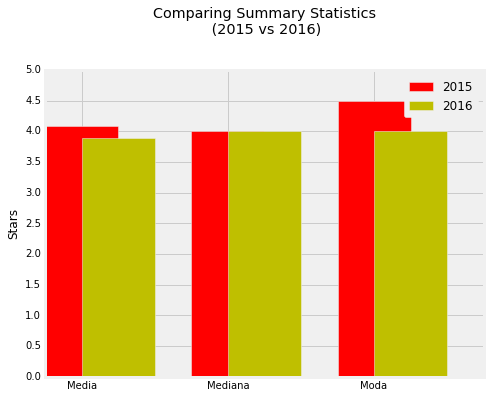

In [74]:
resumen['2015'].plot.bar(align='center',label='2015',color='r',figsize=(7,5.5))
resumen['2016'].plot.bar(align='edge',label='2016',color='y')
plt.title('Comparing Summary Statistics\n (2015 vs 2016)',y=1.1)
plt.ylim(0,5)
plt.yticks(arange(0,5.5,0.5))
plt.ylabel('Stars')
plt.xticks(rotation=0)
plt.legend()

Las metricas para el 2015 son mas grandes para el 2015 excepto por la Mediana que es la misma para ambos, asi podemos decir con seguridad que el ano 2015 tenia calificaciones mas altas con respecto al 2016.

## Conclusion

Se puede concluir que las calificaciones de Roting Tomatos para el ano 2015 estaban ligeramente sobrecalificadas  y que en al ano 2016 hubo un cambio en estas calificaciones hacia una escala menor.

Este pudo haberse debido al estudio que hizo el periosdista sobre las calificaciones que hacia dicha empresa sobre las calificaciones y pudo haber generado malestar en el publico que consumia sus estadisticas.